In [39]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import bqplot as bq

In [40]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [41]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [42]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [55]:
df['cks'] = df['cks'].astype(str)
df['cks'] = df['cks'].str.split(', ')
df_exploded = df.explode('cks')

# Remove brackets, single quotes, double quotes, and leading/trailing whitespace
df_exploded['cks'] = df_exploded['cks'].str.replace(r"[\[\]\"']", "", regex=True).str.strip()

df_exploded.reset_index(drop=True, inplace=True)

In [56]:
# Count unique values in the specified column
unique_count = df_exploded['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 20540


In [61]:
# Step 1: Strip any leading or trailing whitespaces from 'cks' column (if any)
df_exploded['cks'] = df_exploded['cks'].str.strip()

# Define the target cks values
target_cks = ['CK_Motion of the Eighth Sphere', 'CK_Motion of the Eighth Sphere at Boundary']

# Step 2: Filter the DataFrame for rows with target_cks values
filtered_df_target_cks = df_exploded[df_exploded['cks'].isin(target_cks)]

# Debugging: Print the number of rows after filtering to check if any rows match
print(f"Rows after filtering for target cks: {len(filtered_df_target_cks)}")

# Step 3: Get the unique 'images' values associated with the target cks
images_with_target_cks = filtered_df_target_cks['images'].unique()

# Step 4: Get all cks values associated with those images
all_cks_for_images = df_exploded[df_exploded['images'].isin(images_with_target_cks)]

# Step 5: Filter the original DataFrame to include only those rows
filtered_df = all_cks_for_images

Rows after filtering for target cks: 114


In [62]:
df_exploded['cks'] = df_exploded['cks'].str.strip()


# Define the target cks values
target_cks = ['CK_Motion of the Eighth Sphere', 'CK_Motion of the Eighth Sphere at Boundary']

# Step 1: Filter the DataFrame for rows with target_cks values
filtered_df_target_cks = df_exploded[df_exploded['cks'].isin(target_cks)]

# Step 2: Get the unique 'images' values associated with the target cks
images_with_target_cks = filtered_df_target_cks['images'].unique()

# Step 3: Get all cks values associated with those images
all_cks_for_images = df_exploded[df_exploded['images'].isin(images_with_target_cks)]

# Step 4: Filter the original DataFrame to include only those rows
filtered_df = all_cks_for_images

filtered_df

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag
141,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01419,CK_Motion of the Eighth Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Content, Original Part",104,Venice,1488,nan
182,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01374,CK_Motion of the Eighth Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/4f3...,2194,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Content, Annotated",229,Leipzig,1517,nan
226,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01374,CK_Motion of the Eighth Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/6b0...,1795,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Content, Annotated",229,Cologne,1505,nan
246,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00652,CK_Motion of the Eighth Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,1488,nan
247,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00770,CK_Motion of the Eighth Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/0be...,1924,http://sphaera.mpiwg-berlin.mpg.de/id/part/1ea...,Theoricae novae planetarum of Peurbach,"Original Part, Content",104,Venice,1488,nan
...,...,...,...,...,...,...,...,...,...,...,...,...
18512,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01374,CK_Motion of the Eighth Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/52f...,1638,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Content, Original Part",100,Leipzig,1498,nan
21886,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01127,CK_Motion of the Eighth Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/9b9...,2219,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Apian's revised edition of Peuerbach's Theorica,"Annotated, Content",424,Venice,1552,nan
24194,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_02846,CK_Motion of the Eighth Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/514...,1921,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Pifferi's Commentary on the Sphere,"Translation, Annotated, Content",316,Siena,1604,nan
24963,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00676,CK_Motion of the Eighth Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/bb6...,2151,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Clavius's commentary on Sacrobosco's Sphere,"Content, Annotated",295,Geneva,1607,nan


In [63]:
# Count unique values in the specified column
unique_count = filtered_df['images'].nunique()

print(f"Number of unique values in 'images': {unique_count}")

Number of unique values in 'images': 114


In [64]:
# Count unique images associated with each cks value
unique_images_per_cks = filtered_df.groupby('cks')['images'].nunique()

# Print the results
print('Number of unique images associated with each cks value:')
print(unique_images_per_cks)

Number of unique images associated with each cks value:
cks
CK_Motion of the Eighth Sphere    114
Name: images, dtype: int64


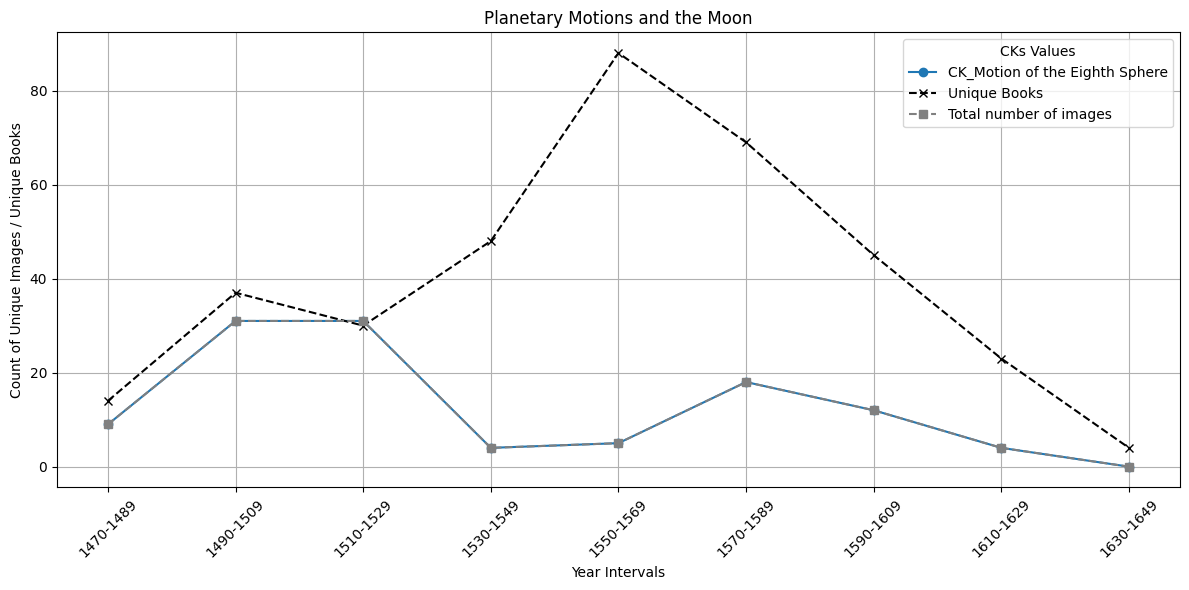

In [65]:
# Ensure the year columns are of integer type
filtered_df = filtered_df.copy()  # Ensure filtered_df is a copy and not a slice
books = books.copy()  # Ensure books is a copy and not a slice

# Convert the 'year' columns to integer type
filtered_df['year'] = filtered_df['year'].astype(int)  # No need for .loc[] here
books['year'] = books['year'].astype(int)  # No need for .loc[] here

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the filtered_df DataFrame
filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique images in each interval for each unique cks value
unique_images_count = (filtered_df.groupby(['interval', 'cks'], observed=False)['images']
                       .nunique().unstack(fill_value=0))

# Count unique books in each interval
unique_books_count = books.groupby('interval', observed=False)['book'].nunique()  # Assuming 'book' is the correct column

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting unique images for each cks value
for cks_value in unique_images_count.columns:
    plt.plot(unique_images_count.index, unique_images_count[cks_value], marker='o', label=cks_value)

# Plot unique books counts as a line
plt.plot(unique_books_count.index, unique_books_count.values, marker='x', color='black', linestyle='--', label='Unique Books')

total_unique_images = filtered_df.groupby('interval', observed=False)['images'].nunique()
plt.plot(total_unique_images.index, total_unique_images.values, marker='s', color='grey', linestyle='--', label='Total number of images')

# Customize the plot
plt.title('Planetary Motions and the Moon')
plt.xlabel('Year Intervals')
plt.ylabel('Count of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='CKs Values')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_2720\2866083729.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_with_104['year'] = pd.to_numeric(books_with_104['year'], errors='coerce').astype('Int64')
C:\Users\nogas\AppData\Local\Temp\ipykernel_2720\2866083729.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_with_104.loc[:, 'interval'] = pd.cut(books_with_104['year'], bins=bins, labels=labels, right=False)


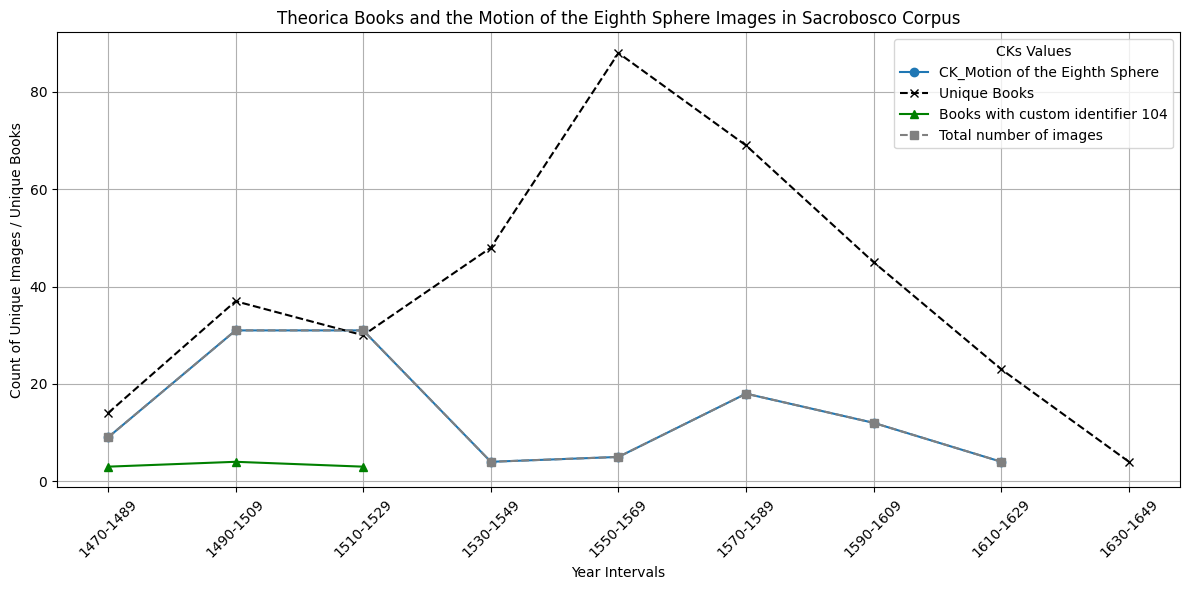

In [66]:
# Ensure the year columns are of integer type in all relevant DataFrames
filtered_df = filtered_df.copy()  # Ensure filtered_df is a copy and not a slice
books = books.copy()  # Ensure books is a copy and not a slice

# Convert the 'year' columns to integer type, handling non-numeric values
filtered_df['year'] = pd.to_numeric(filtered_df['year'], errors='coerce').astype('Int64')  # Convert to integer, keep NaN for invalid
books['year'] = pd.to_numeric(books['year'], errors='coerce').astype('Int64')  # Convert to integer, keep NaN for invalid

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the filtered_df DataFrame
filtered_df['interval'] = pd.cut(filtered_df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Count unique images in each interval for each unique cks value
unique_images_count = (filtered_df.groupby(['interval', 'cks'], observed=True)['images']
                       .nunique().unstack(fill_value=0))

# Count unique books in each interval
unique_books_count = books.groupby('interval', observed=True)['book'].nunique()  # Assuming 'book' is the correct column

# Ensure df has the required 'custom_identifier' column
# Filter books with custom identifier 104 (checking if '104' is in the custom identifier column)
books_with_104 = df[df['custom_identifier'].apply(lambda x: '104' in str(x))]  # Adjust if it's a list or another format

# Convert the 'year' column of books_with_104 to integers (handle non-numeric values)
books_with_104['year'] = pd.to_numeric(books_with_104['year'], errors='coerce').astype('Int64')

# Add the 'interval' column to the books_with_104 DataFrame
books_with_104.loc[:, 'interval'] = pd.cut(books_with_104['year'], bins=bins, labels=labels, right=False)

# Count the unique books with custom identifier 104 in each interval
unique_books_with_104 = books_with_104.groupby('interval', observed=True)['book'].nunique()

# Create the plot
plt.figure(figsize=(12, 6))

# Plotting unique images for each cks value
for cks_value in unique_images_count.columns:
    plt.plot(unique_images_count.index, unique_images_count[cks_value], marker='o', label=cks_value)

# Plot unique books counts as a line
plt.plot(unique_books_count.index, unique_books_count.values, marker='x', color='black', linestyle='--', label='Unique Books')

# Plot unique books with custom identifier 104 as a separate line if there are any (avoid plotting if zero)
if unique_books_with_104.sum() > 0:  # Check if there's any non-zero value
    plt.plot(unique_books_with_104.index, unique_books_with_104.values, marker='^', color='green', linestyle='-', label='Books with custom identifier 104')

# Plot total unique images as a line (all images, for reference)
total_unique_images = filtered_df.groupby('interval', observed=True)['images'].nunique()
plt.plot(total_unique_images.index, total_unique_images.values, marker='s', color='grey', linestyle='--', label='Total number of images')

# Customize the plot
plt.title('Theorica Books and the Motion of the Eighth Sphere Images in Sacrobosco Corpus')
plt.xlabel('Year Intervals')
plt.ylabel('Count of Unique Images / Unique Books')
plt.xticks(rotation=45)
plt.legend(title='CKs Values')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
books

In [ ]:
df

In [ ]:
# For example, if you want to print unique values from the 'column_name' column in a DataFrame called 'df':
print(df['custom_identifier'].unique())


In [ ]:
# Filter the books in 'df' DataFrame where 'custom_identifier' contains '104'
books_with_104 = df[df['custom_identifier'].apply(lambda x: '104' in str(x))]

# Get the unique book values that have custom identifier 104
unique_books_with_104 = books_with_104['book'].nunique()

# Show the years of those books
books_with_104_years = books_with_104[['book', 'year']].drop_duplicates()

# Print the results
print(f"Number of unique books with custom identifier 104: {unique_books_with_104}")
print("Books with custom identifier 104 and their years:")
print(books_with_104_years)
